In [1]:
#**** Sentiment Analysis using Dutch Tweets****
# by SELIM SAMETOGLU
# This is a secondary version where I try to implement pipelines from scikitlearn


In [2]:
# to connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load the dependencies
# Utility
import pandas as pd
import numpy as np
import re
# Prepro
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Plotting
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# Has to be installed at each runtime
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=cf8cf6f773c3b3ac95d43ebb8642e5778e152a07a641fa0002a171ec6d3a4a5b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [8]:
# Load the dataset
data = pd.read_json("/content/drive/MyDrive/Collab_data/dutch_tweets_chunk0.json")

In [9]:
# Check the lenght of the data
print('number of messages:', len(data))

number of messages: 27019


In [10]:
# data[["sentiment_pattern"]].hist()

In [11]:
# data[["sentiment_pattern"]]

array([[<Axes: title={'center': 'sentiment_pattern'}>]], dtype=object)

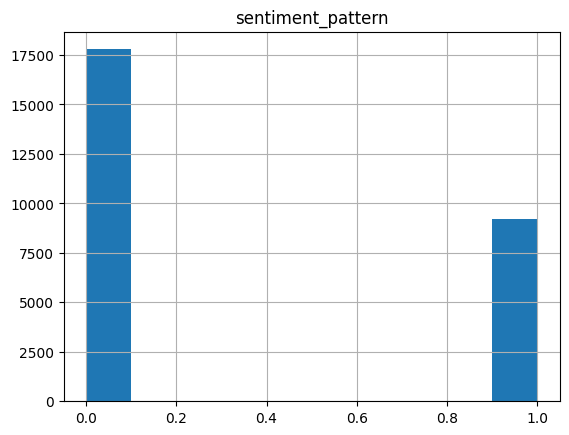

In [12]:
data.loc[data["sentiment_pattern"] <0, "sentiment_pattern"] = 0
data.loc[data["sentiment_pattern"] >0, "sentiment_pattern"] = 1
data[["sentiment_pattern"]].hist()


In [13]:
# take only a small portion for better speed
data = data[:1500]

In [14]:
# filter out non-Dutch sentences


from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

data['language']=data['full_text'].apply(detect_language)




In [15]:
data = data[data['language'] == 'nl']

In [16]:
data.drop('language', axis = 1, inplace = True)

<ipython-input-16-31ecd324e3e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('language', axis = 1, inplace = True)


In [17]:
data.head()

,full_text,text_translation,created_at,screen_name,description,desc_translation,weekofyear,weekday,day,month,...,point,latitude,longitude,altitude,province,hisco_standard,hisco_code,industry,sentiment_pattern,subjective_pattern
2,RT @DDStandaard: De droom van D66 wordt werkel...,RT @DDStandaard: The D66 dream come true: COVI...,2020-03-09 12:26:37,EricL65,None,None,11,0,9,3,...,None,NaN,NaN,0.0,False,None,None,False,0.0,0.00
3,RT @DDStandaard: De droom van D66 wordt werkel...,RT @DDStandaard: The D66 dream come true: COVI...,2020-03-09 12:26:37,EricL65,None,None,11,0,9,3,...,None,NaN,NaN,0.0,False,None,None,False,0.0,0.00
4,De droom van D66 wordt werkelijkheid: COVID-19...,The D66 dream becomes reality: COVID-19 super ...,2020-03-09 12:26:47,EhrErwin,Budget-Life Coach. Time management Coaching. b...,Budget-Life Coach. Time management coaching. h...,11,0,9,3,...,"(52.3727598, 4.8936041, 0.0)",52.37276,4.893604,0.0,Noord-Holland,None,None,False,0.0,0.00
5,De droom van D66 wordt werkelijkheid: COVID-19...,The D66 dream becomes reality: COVID-19 super ...,2020-03-09 12:26:47,EhrErwin,Budget-Life Coach. Time management Coaching. b...,Budget-Life Coach. Time management coaching. h...,11,0,9,3,...,"(52.3727598, 4.8936041, 0.0)",52.37276,4.893604,0.0,Noord-Holland,None,None,False,0.0,0.00
9,RT @FrankvanWijck: Het aantal deskundigen over...,RT @FrankvanWijck: The number of experts on co...,2020-03-09 12:27:35,martijnmollers,Chirurg @ Heelkunde Friesland | Auteur Hart en...,Surgeon @ Surgery Friesland | Author Heart and...,11,0,9,3,...,None,NaN,NaN,0.0,False,None,None,False,1.0,0.75


In [18]:
data = data[["full_text", "sentiment_pattern"]]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 42)

In [21]:
# checking null values
np.sum(data.isnull().any(axis=1))

0

In [22]:
data.columns = ["text", "label"]

In [23]:
# make the statement text in lowercase
data['text']=data['text'].str.lower()

In [24]:
data['text'].tail()

1493    rt @ojongere: 😰😰😰😰🤬🤬🤬🤬🤬\ncorona blijkt stuk ha...
1494    waalse ps-minister: “belgië is een gecomplicee...
1495    corona in drenthe en groningen | de jacht op d...
1496    rt @bos_m: jaap van dissel, rivm: 'ook nieuw o...
1499    rt @_sbp99: ik ga niet liegen deze lockdown ha...
Name: text, dtype: object

In [25]:
# define the DUTCH stopwordlist
stopwordlist = ['aan',
'al',
'alles',
'als',
'altijd',
'andere',
'ben',
'bij',
'daar',
'dan',
'dat',
'de',
'der',
'deze',
'die',
'dit',
'doch',
'doen',
'door',
'dus',
'een',
'eens',
'en',
'er',
'ge',
'geen',
'geweest',
'haar',
'had',
'heb',
'hebben',
'heeft',
'hem',
'het',
'hier',
'hij',
'hoe',
'hun',
'iemand',
'iets',
'ik',
'in',
'is',
'ja',
'je',
'kan',
'kon',
'kunnen',
'maar',
'me',
'meer',
'men',
'met',
'mij',
'mijn',
'moet',
'na',
'naar',
'niet',
'niets',
'nog',
'nu',
'of',
'om',
'omdat',
'onder',
'ons',
'ook',
'op',
'over',
'reeds',
'te',
'tegen',
'toch',
'toen',
'tot',
'u',
'uit',
'uw',
'van',
'veel',
'voor',
'want',
'waren',
'was',
'wat',
'werd',
'wezen',
'wie',
'wil',
'worden',
'wordt',
'zal',
'ze',
'zelf',
'zich',
'zij',
'zijn',
'zo',
'zonder',
'zou']


In [26]:
# clean and remove the stopwords from the text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

2    rt @ddstandaard: droom d66 werkelijkheid: covi...
3    rt @ddstandaard: droom d66 werkelijkheid: covi...
4    droom d66 werkelijkheid: covid-19 superdodelij...
5    droom d66 werkelijkheid: covid-19 superdodelij...
9    rt @frankvanwijck: aantal deskundigen corona g...
Name: text, dtype: object

In [27]:
# clean and remove the punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

1493    rt ojongere 😰😰😰😰🤬🤬🤬🤬🤬 corona blijkt stuk harde...
1494    waalse psminister “belgië gecompliceerd land p...
1495    corona drenthe groningen  jacht mondkapjes gaa...
1496    rt bosm jaap dissel rivm ook nieuw onderzoek s...
1499            rt sbp99 ga liegen lockdown wel voordelen
Name: text, dtype: object

In [28]:
# clean and remove repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

1493    rt ojongere 😰😰😰😰🤬🤬🤬🤬🤬 corona blijkt stuk harde...
1494    waalse psminister “belgië gecompliceerd land p...
1495    corona drenthe groningen  jacht mondkapjes gaa...
1496    rt bosm jaap dissel rivm ook nieuw onderzoek s...
1499            rt sbp99 ga liegen lockdown wel voordelen
Name: text, dtype: object

In [29]:
# clean and remove URLs
def cleaning_URLs(dataset):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ', dataset)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

1493    rt ojongere 😰😰😰😰🤬🤬🤬🤬🤬 corona blijkt stuk harde...
1494    waalse psminister “belgië gecompliceerd land p...
1495    corona drenthe groningen  jacht mondkapjes gaa...
1496    rt bosm jaap dissel rivm ook nieuw onderzoek s...
1499            rt sbp99 ga liegen lockdown wel voordelen
Name: text, dtype: object

In [30]:
# clean and remove numbers
def cleaning_numbers(dataset):
    return re.sub('[0-9]+', '', dataset)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

1493    rt ojongere 😰😰😰😰🤬🤬🤬🤬🤬 corona blijkt stuk harde...
1494    waalse psminister “belgië gecompliceerd land p...
1495    corona drenthe groningen  jacht mondkapjes gaa...
1496    rt bosm jaap dissel rivm ook nieuw onderzoek s...
1499              rt sbp ga liegen lockdown wel voordelen
Name: text, dtype: object

In [31]:
data['text']

2       rt ddstandaard droom d werkelijkheid covi supe...
3       rt ddstandaard droom d werkelijkheid covi supe...
4       droom d werkelijkheid covi superdodelijk ouder...
5       droom d werkelijkheid covi superdodelijk ouder...
9       rt frankvanwijck aantal deskundigen corona gri...
                              ...                        
1493    rt ojongere 😰😰😰😰🤬🤬🤬🤬🤬 corona blijkt stuk harde...
1494    waalse psminister “belgië gecompliceerd land p...
1495    corona drenthe groningen  jacht mondkapjes gaa...
1496    rt bosm jaap dissel rivm ook nieuw onderzoek s...
1499              rt sbp ga liegen lockdown wel voordelen
Name: text, Length: 1181, dtype: object

In [32]:
# tokenization
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
data['text'] = data['text'].apply(tokenizer.tokenize)
data['text']

2       [rt, ddstandaard, droom, d, werkelijkheid, cov...
3       [rt, ddstandaard, droom, d, werkelijkheid, cov...
4       [droom, d, werkelijkheid, covi, superdodelijk,...
5       [droom, d, werkelijkheid, covi, superdodelijk,...
9       [rt, frankvanwijck, aantal, deskundigen, coron...
                              ...                        
1493    [rt, ojongere, 😰😰😰😰🤬🤬🤬🤬🤬, corona, blijkt, stuk...
1494    [waalse, psminister, “belgië, gecompliceerd, l...
1495    [corona, drenthe, groningen, jacht, mondkapjes...
1496    [rt, bosm, jaap, dissel, rivm, ook, nieuw, ond...
1499      [rt, sbp, ga, liegen, lockdown, wel, voordelen]
Name: text, Length: 1181, dtype: object

In [33]:
# stemming
from nltk.stem.snowball import DutchStemmer

st = DutchStemmer()
def stemming_on_text(dataset):
    text = [st.stem(word) for word in dataset]
    return dataset
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

2    [rt, ddstandaard, droom, d, werkelijkheid, cov...
3    [rt, ddstandaard, droom, d, werkelijkheid, cov...
4    [droom, d, werkelijkheid, covi, superdodelijk,...
5    [droom, d, werkelijkheid, covi, superdodelijk,...
9    [rt, frankvanwijck, aantal, deskundigen, coron...
Name: text, dtype: object

In [34]:
# create the 'X' with the features, and create the'y' with the annotations/sentiment
X = data['text']
y = data['label']


## WordClouds

In [ ]:
# Categorize data as positive and negative
data_pos = data.loc[data['label'] == 1]
data_neg = data.loc[data['label'] == 0]
data_pos = data_pos['text']
data_neg = data_neg['text']

### Word cloud for negative words

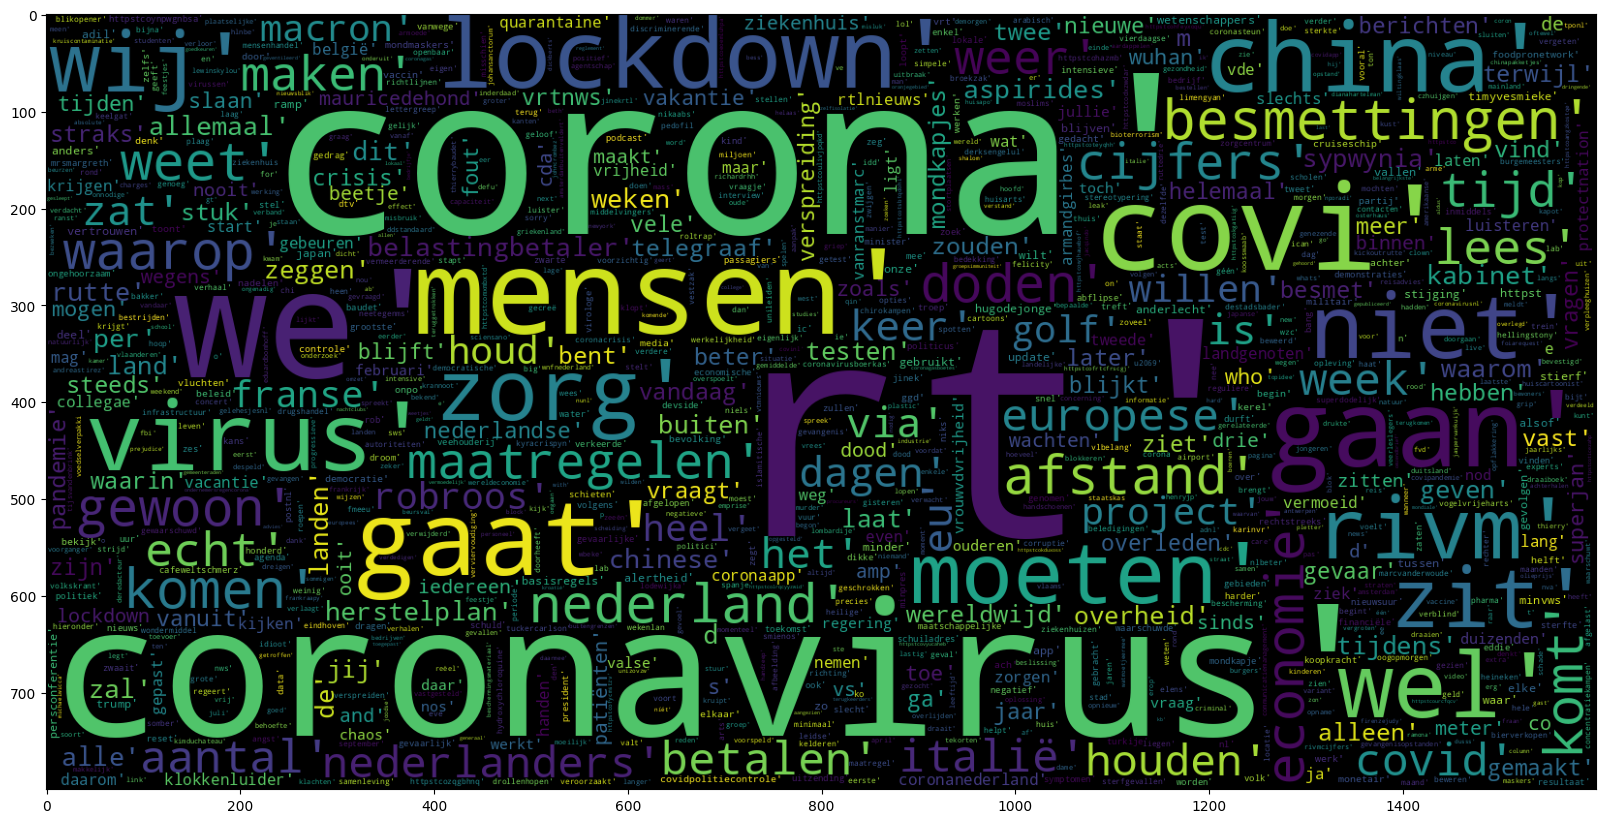

In [38]:
# Neg word cloud
# data_neg = data_neg[:9230]
plt.figure(figsize = (20,20))
wc_neg = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(map(str, data_neg)))
plt.imshow(wc_neg)


### Word cloud for positive words

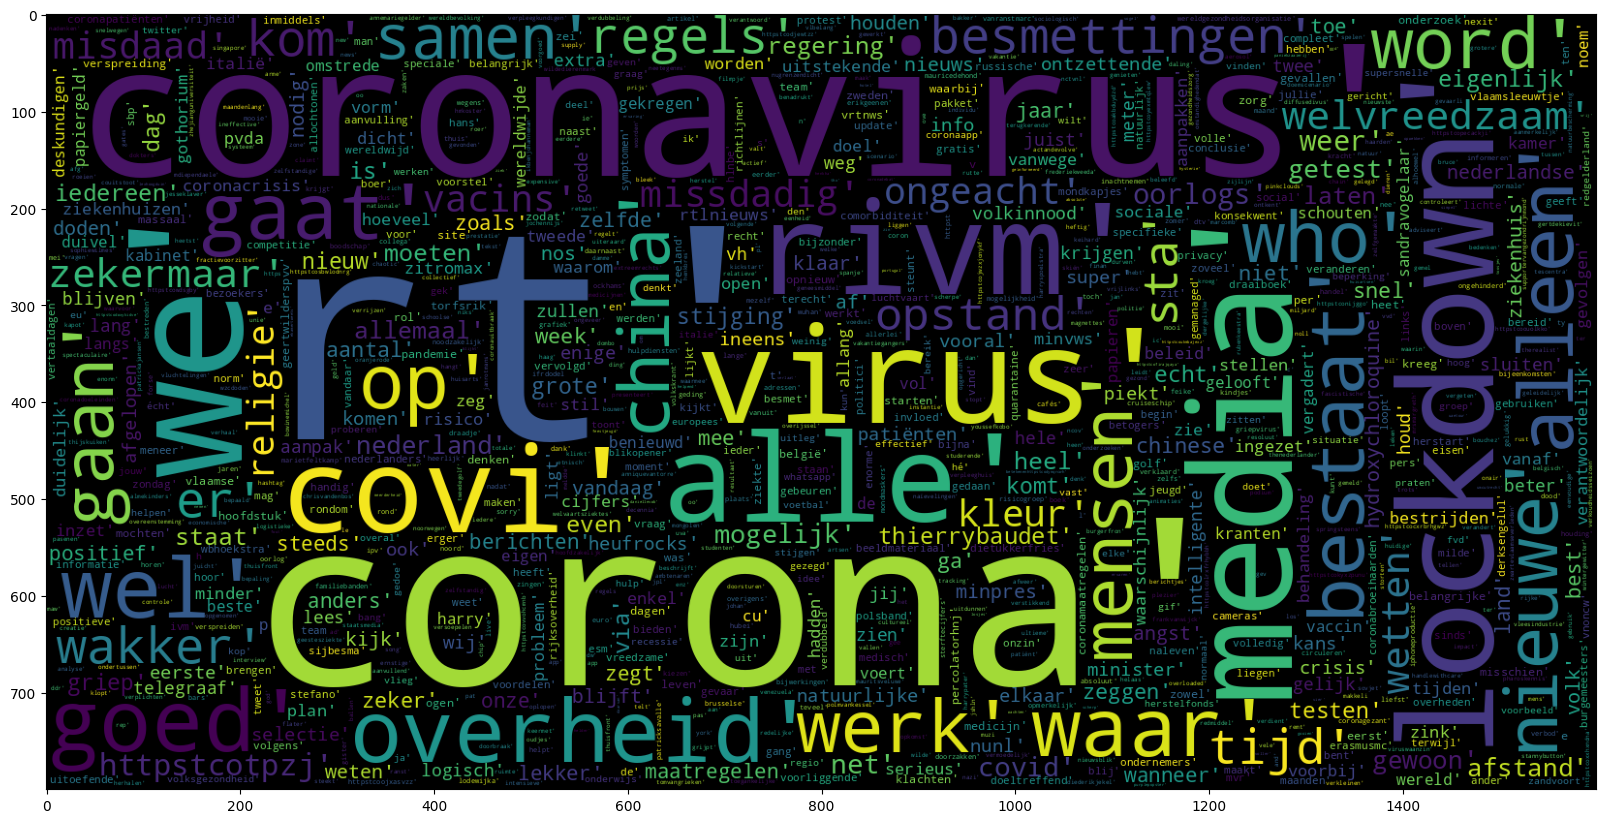

In [39]:
# pos wordcloud
# data_pos = data_pos[:17789]
plt.figure(figsize = (20,20))
wc_pos = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(map(str, data_pos)))
plt.imshow(wc_pos)


## Modelling

## Prepare the data

In [40]:
# Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

In [41]:
# Turn data into strings (ensures, otherwise may throw an error)
X_train = X_train.astype(str)
X_test = X_test.astype(str)

### Fit the TF-IDF Vectorizer

In [42]:
# Fit the tf-idf vectorizer on the training data (!)
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features = 500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [43]:
# Check how many feature words are extracted
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  13309


### Transform the data according to TF-IDF vectorizer

In [53]:
# Transform the data (both train and test data!) using the tf-idf vectorizer
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

AttributeError: ignored

### Model Evaluation

In [45]:
# Define a function for model evaluation
# creds to https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Model 1: Train and evaluate a Bernoulli Naive Bayes model

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        36
         1.0       1.00      0.83      0.91        24

    accuracy                           0.93        60
   macro avg       0.95      0.92      0.93        60
weighted avg       0.94      0.93      0.93        60



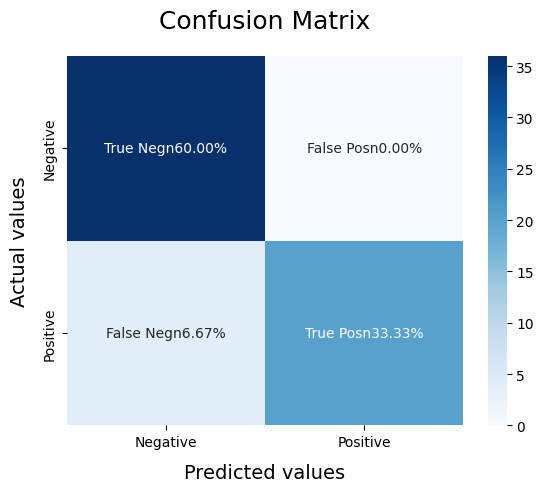

In [46]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

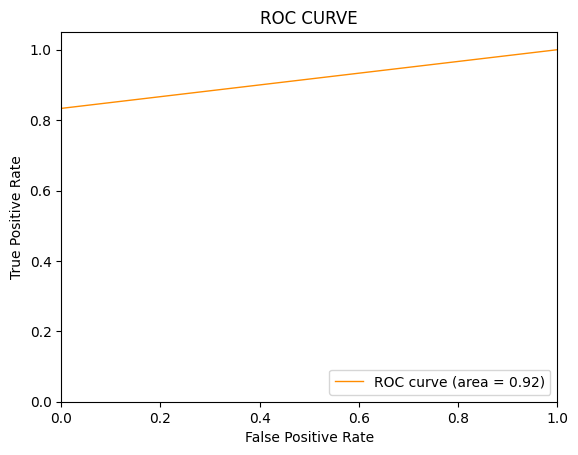

In [47]:
# Define a function for receiving a ROC curve and RUN it.
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Model 2: Train and evaluate a Linear Support Vector Classification model

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        36
         1.0       0.91      0.88      0.89        24

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



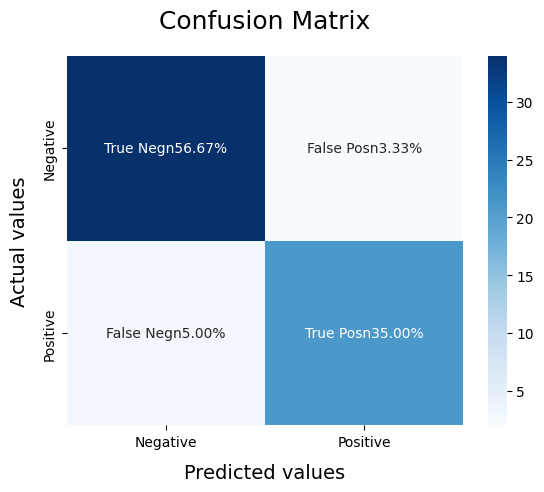

In [48]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

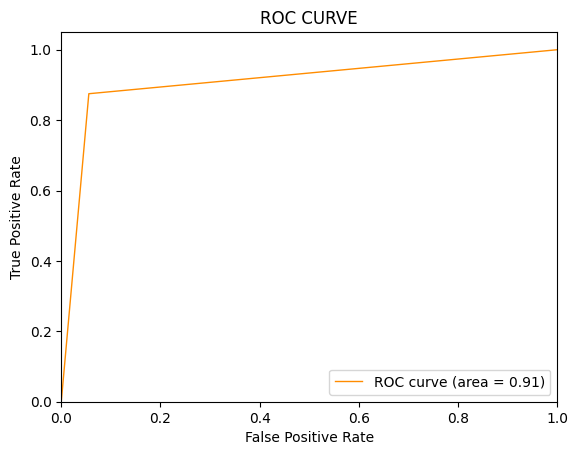

In [49]:
# Define a function for receiving a ROC curve and RUN it.
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Model 3: Train and evaluate a Logistic regression model

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        36
         1.0       0.91      0.83      0.87        24

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60



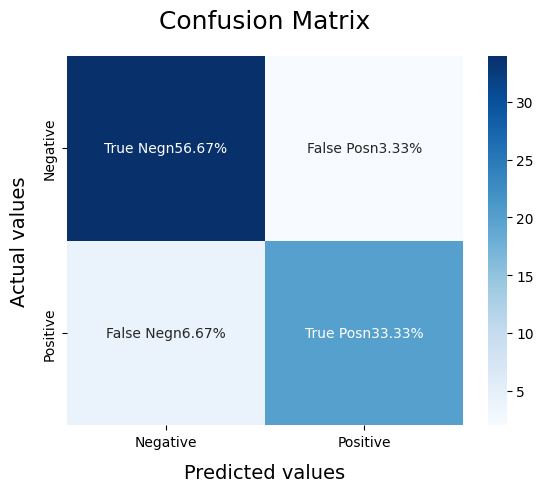

In [50]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

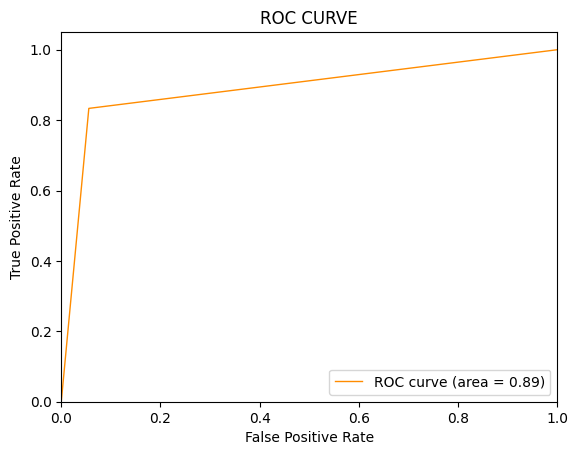

In [51]:
# Define a function for receiving a ROC curve and RUN it.
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Overall Interpretation:

In [ ]:
# The linear support vector classifier (svc) worked the best


# Using Custom Transformers and Scikit pipelines to train models

In [52]:
#  Creating a column selector (custom transformer)


from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
  def __init__(self, key):
    self.key = key

  def fit(self, X, y=None):
    return self

  def transform(self, X, y =None):
    return X[self.key]

class NumberSelector(BaseEstimator, TransformerMixin):
  def __init__(self, key):
    self.key = key

  def fit(self, X, y = None):
    return self

  def transform(self, X, y =None):
    return X[[self.key]]


In [ ]:
# clean and remove the stopwords from the text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

# clean and remove the punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

# clean and remove repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

# clean and remove URLs
def cleaning_URLs(dataset):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ', dataset)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

# clean and remove numbers
def cleaning_numbers(dataset):
    return re.sub('[0-9]+', '', dataset)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

# tokenization
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
data['text'] = data['text'].apply(tokenizer.tokenize)
data['text']

# stemming
from nltk.stem.snowball import DutchStemmer

st = DutchStemmer()
def stemming_on_text(dataset):
    text = [st.stem(word) for word in dataset]
    return dataset
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()